In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [6]:
data1= pd.read_csv('D:\\Assignment_CS\\Utshav\\data.txt')
data1.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [8]:
data1.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


<function matplotlib.pyplot.show(close=None, block=None)>

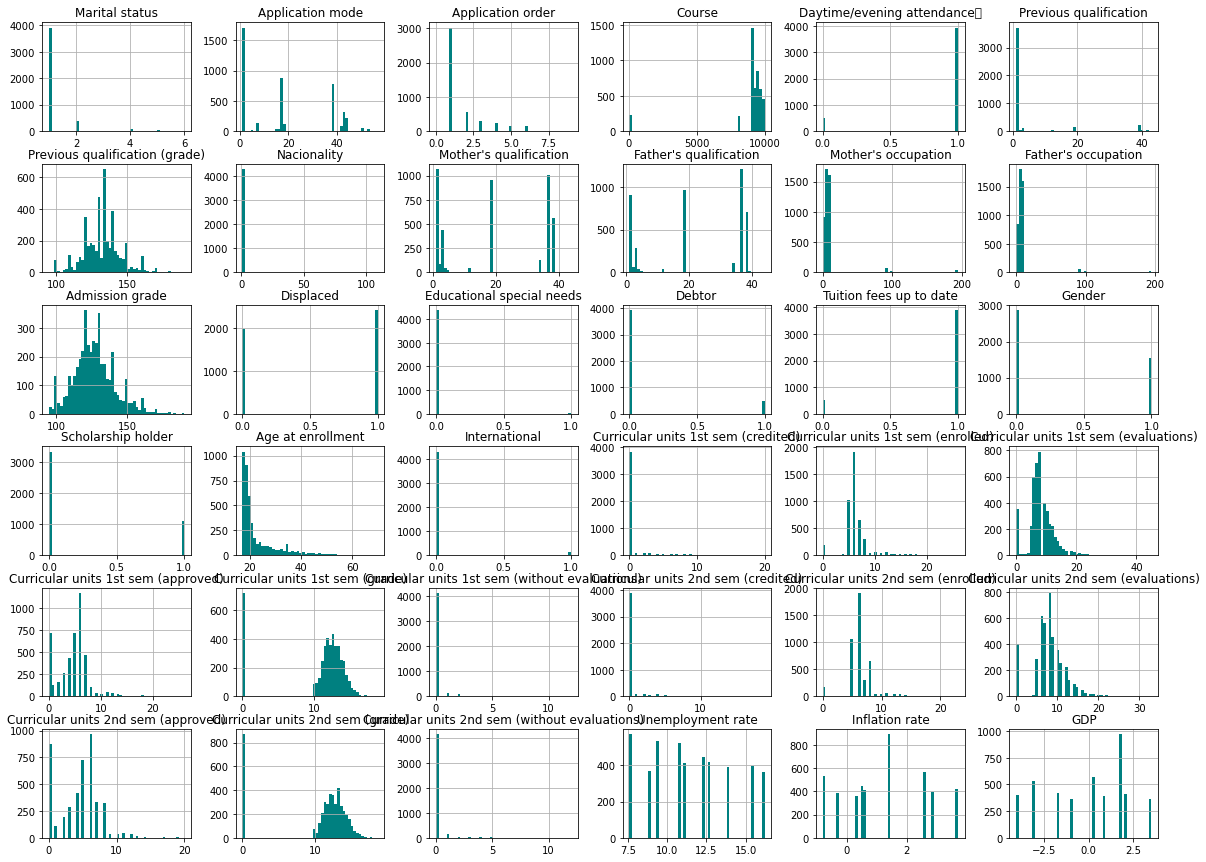

In [9]:
data1[data1.columns].hist(bins=50, figsize=(20,15), color='#008080')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

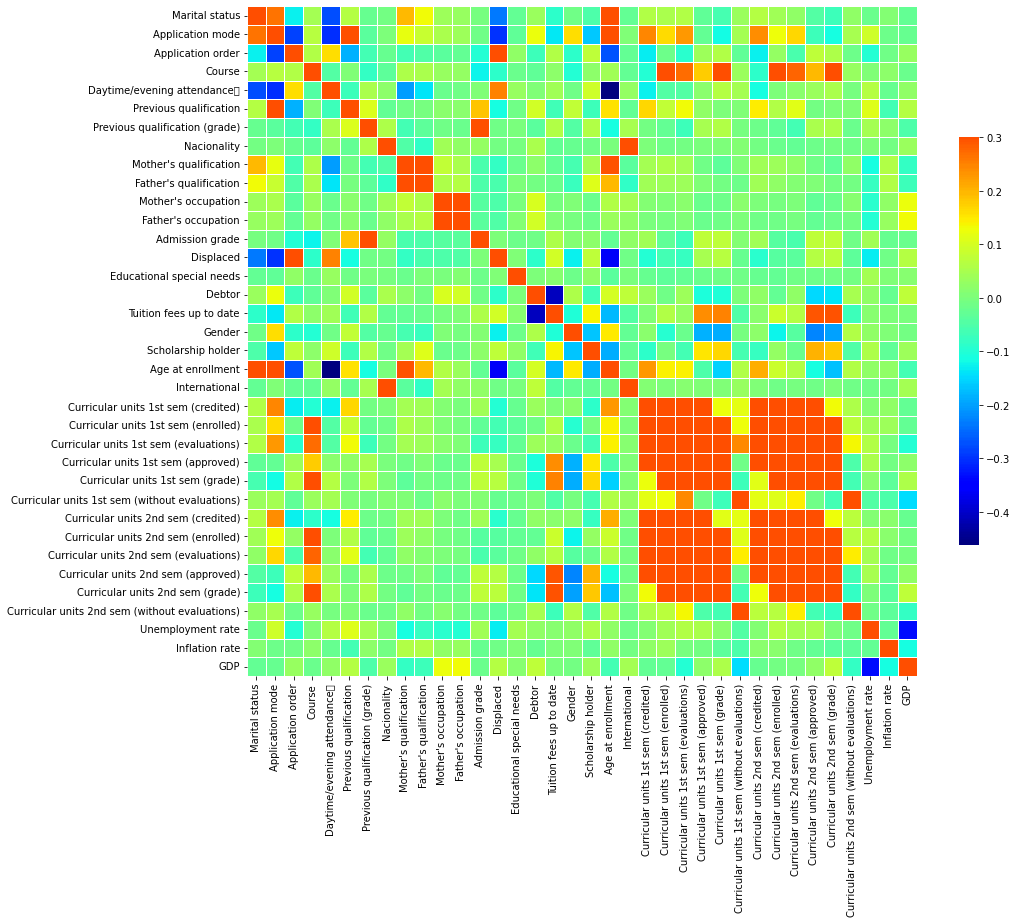

In [16]:
f = plt.figure(figsize=(15, 15))
sns.heatmap(data1.corr(),annot=False, cmap='jet',vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show

In [3]:
X = data1.iloc[:, :-1].values
y = data1['Target'].map({'Graduate':1.0,'Dropout':0.0,'Enrolled':2.0})
y


0       0.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
4419    1.0
4420    0.0
4421    0.0
4422    1.0
4423    1.0
Name: Target, Length: 4424, dtype: float64

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y,train_size=0.80,test_size=0.20,random_state=999)

In [5]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=10, 
                                    n_repeats=3, 
                                    random_state=999)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)


classifier = RandomForestClassifier(n_estimators=300, random_state=0)

all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=Y_train, cv=cv_method)

In [7]:
print(all_accuracies)

[0.74858757 0.77118644 0.76836158 0.78531073 0.77118644 0.78248588
 0.77966102 0.78531073 0.77966102 0.75354108 0.77118644 0.75141243
 0.76553672 0.77683616 0.7740113  0.75141243 0.76271186 0.77683616
 0.80225989 0.78186969 0.78531073 0.77966102 0.75706215 0.76553672
 0.77118644 0.76271186 0.76553672 0.76836158 0.75423729 0.76487252]


In [8]:
print(all_accuracies.mean())

0.7704614202717625


In [9]:
print(all_accuracies.std())

0.012197594816972664


In [10]:
### Stratified cross-validation on the dataset train a random forest. 

from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold

X = data1.iloc[:, :-1].values
y = data1.iloc[:, -1].values

# Feature Scaling for input features.
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)


skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(X,y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    classifier.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(classifier.score(x_test_fold, y_test_fold))

In [11]:
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.7787810383747178, 0.7584650112866818, 0.781038374717833, 0.7968397291196389, 0.7918552036199095, 0.7647058823529411, 0.7647058823529411, 0.7579185520361991, 0.7895927601809954, 0.7692307692307693]

Maximum Accuracy That can be obtained from this model is: 79.68397291196389 %

Minimum Accuracy: 75.7918552036199 %

Overall Accuracy: 77.53133203272627 %

Standard Deviation is: 0.014275854857292618


In [12]:
### Grid search 10-fold cross-validation to tune the hyperparameters of the random forest.

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

grid = GridSearchCV(classifier,
                    param_grid = {'max_depth': [None, 2,3,5], 'max_features' : ['auto','sqrt', 'log2'], 'n_estimators': [10,100],},
                    cv = skf,
                    verbose=50,
                    n_jobs=-1)

grid.fit(X_train, Y_train)

print('\nBest R^2 Score : %.2f'%grid.best_score_, ' Best Params : ', str(grid.best_params_))

Fitting 10 folds for each of 24 candidates, totalling 240 fits

Best R^2 Score : 0.77  Best Params :  {'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}


In [13]:
pd.DataFrame(grid.cv_results_)[['param_max_depth', 'param_max_features', 'param_n_estimators','mean_test_score', 'rank_test_score']]


,param_max_depth,param_max_features,param_n_estimators,mean_test_score,rank_test_score
0,None,auto,10,0.733253,11
1,None,auto,100,0.770834,1
2,None,sqrt,10,0.733253,11
3,None,sqrt,100,0.770834,1
4,None,log2,10,0.739191,10
5,None,log2,100,0.766877,3
6,2,auto,10,0.680981,23
7,2,auto,100,0.718562,16
8,2,sqrt,10,0.680981,23
9,2,sqrt,100,0.718562,16


In [14]:
###KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [15]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)


{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [16]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=skf, scoring='accuracy', return_train_score=False) 
grid.fit(X, y)
# view the results
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]


,mean_test_score,std_test_score,params
0,0.566676,0.023173,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.566676,0.023173,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.523509,0.023216,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.566676,0.023173,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.594032,0.014783,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.596973,0.016365,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.593127,0.017885,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.601942,0.018669,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.595379,0.023296,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.603974,0.019731,"{'n_neighbors': 5, 'weights': 'distance'}"


In [17]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.6268066351388619
{'n_neighbors': 14, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=14, weights='distance')


In [18]:
###SVM
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1).fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.7740112994350282

In [19]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=10)
scores

array([0.76072235, 0.76975169, 0.751693  , 0.76749436, 0.77828054,
       0.77375566, 0.75565611, 0.76923077, 0.74886878, 0.74660633])

In [20]:
max(scores)

0.7782805429864253

In [22]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'kernel': ['rbf']} 
grid = GridSearchCV(clf, param_grid, cv = skf, refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(X_train, Y_train)
# print best parameter after tuning


Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV 1/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.497 total time=   1.4s
[CV 2/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.497 total time=   1.3s
[CV 3/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.497 total time=   1.4s
[CV 4/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.497 total time=   1.4s
[CV 5/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.497 total time=   1.3s
[CV 6/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.497 total time=   1.3s
[CV 7/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.497 total time=   1.4s
[CV 8/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.494 total time=   1.3s
[CV 9/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.494 total time=   1.3s
[CV 10/10] END ......C=0.1, gamma=1, kernel=rbf;, score=0.496 total time=   1.7s
[CV 1/10] END .....C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   1.3s
[CV 2/10] END .....C=0.1, gamma=0.1, kernel=rb

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             estimator=SVC(C=1, kernel='linear', random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [24]:
print(grid.best_score_)
print(grid.best_params_)

0.7660248715609544
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
